# Deep learning - Wine Quality challenge

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pyplot import style
style.use('seaborn-whitegrid')
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.regularizers import l2

### LOAD DATASET

In [2]:
df = pd.read_csv('wine.csv', index_col = 0)

In [3]:
names = df.columns

In [4]:
from sklearn import preprocessing

df_norm = pd.read_csv('wine.csv', index_col = 0)
d = preprocessing.normalize(df_norm)
df_norm = pd.DataFrame(d, columns=names)
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728
1,0.106989,0.012071,0.000000,0.035663,0.001344,0.342913,0.919006,0.013673,0.043893,0.009327,0.134422,0.068583
2,0.134949,0.013149,0.000692,0.039793,0.001592,0.259517,0.934261,0.017249,0.056402,0.011246,0.169551,0.086506
3,0.173611,0.004340,0.008681,0.029452,0.001163,0.263517,0.930059,0.015470,0.048983,0.008991,0.151910,0.093006
4,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728


### FEATURE ENGINEERING

In [5]:
quality_to_1 = [7,8,9,10]
quality_to_0 = [1,2,3,4,5,6]
for quality in quality_to_1:
    df['quality'] = df['quality'].replace(quality, '1')

for qualit in quality_to_0:
    df['quality'] = df['quality'].replace(qualit, '0')

In [6]:
df = df.apply(pd.to_numeric)

In [7]:
df1 = df[df['quality'] == 1]

In [8]:
df_copy = df.append(df1).append(df1).append(df1)

In [9]:
df_copy['quality'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0    5220
1    5108
Name: quality, dtype: int64>

In [10]:
df = df_copy

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10328 entries, 0 to 4896
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         10328 non-null  float64
 1   volatile acidity      10328 non-null  float64
 2   citric acid           10328 non-null  float64
 3   residual sugar        10328 non-null  float64
 4   chlorides             10328 non-null  float64
 5   free sulfur dioxide   10328 non-null  float64
 6   total sulfur dioxide  10328 non-null  float64
 7   density               10328 non-null  float64
 8   pH                    10328 non-null  float64
 9   sulphates             10328 non-null  float64
 10  alcohol               10328 non-null  float64
 11  quality               10328 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.0 MB


In [12]:
X = df.drop('quality', axis = 1)
y = df['quality']

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
index,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [13]:
X.shape, y.shape

((10328, 11), (10328,))

In [13]:
X_train.shape, y_train.shape

NameError: name 'X_train' is not defined

In [ ]:
X_test.shape, y_test.shape

## PLOTS

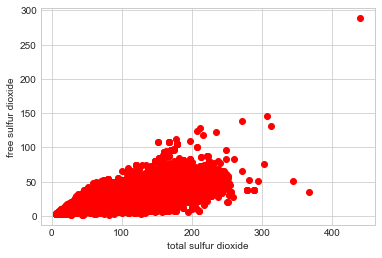

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlabel = 'total sulfur dioxide',
      ylabel = 'free sulfur dioxide')
ax.scatter(df['total sulfur dioxide'], df['free sulfur dioxide'], c='r')
plt.show()

<AxesSubplot:>

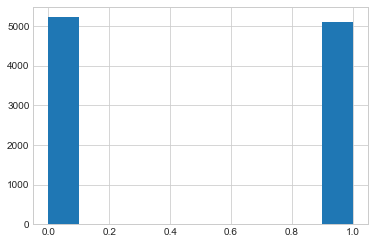

In [48]:
df['quality'].hist()

<AxesSubplot:>

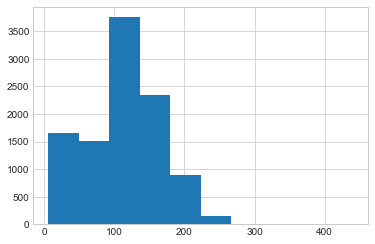

In [49]:
df['total sulfur dioxide'].hist()

<AxesSubplot:>

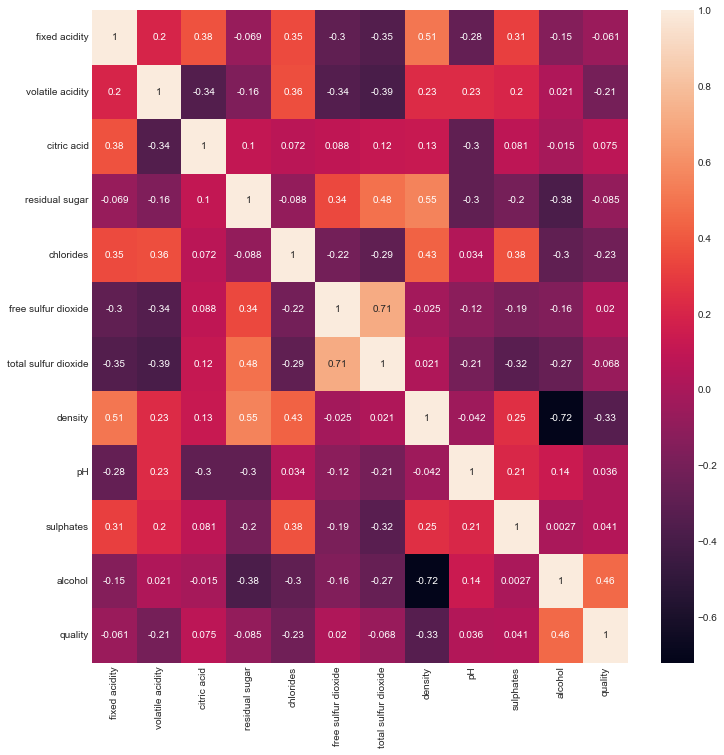

In [50]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:>

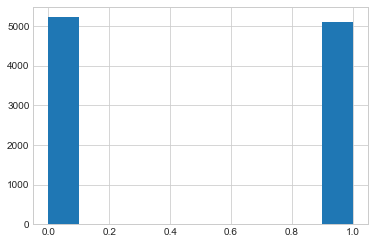

In [159]:
df['quality'].hist()

## Train & Test Set Splits

#### Original Data Splits

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Normalized Data Splits

In [15]:
Xn = df_norm.drop('quality', axis = 1)
yn = df_norm['quality']
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.2)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
index,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### STANDARDIZED DATA SPLITS

In [16]:
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)  # scaler should be fitted to train only not the entire set
X_test_s = scaler.transform(X_test)

### FUNCTIONS

In [17]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Reds, figsize=(10,10)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
cm_plot_labels = ['Good Wine','Bad Wine']

### Deep Learning Model - BASE

In [95]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Specify the model
model = Sequential()

model.add(Dense(20, activation='relu', input_shape = (11,)))
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))

adam = Adam(lr=0.003)
# Compile the model
model.compile(optimizer = adam, loss = 'mean_squared_error',
metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 3)

# Fit the model
history_base = model.fit(X_train, y_train,validation_split = 0.3,validation_data=(X_test, y_test),
           batch_size=2048, epochs = 200, callbacks = [early_stopping_monitor])

pred1 = model.predict(X_test)

/Users/jacquesdeclercq/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
3/3 [==============================] - 1s 69ms/step - loss: 0.3057 - accuracy: 0.4897 - val_loss: 0.2614 - val_accuracy: 0.5204
Epoch 2/200
3/3 [==============================] - 0s 13ms/step - loss: 0.2647 - accuracy: 0.5067 - val_loss: 0.2549 - val_accuracy: 0.5430
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 0.2594 - accuracy: 0.5077 - val_loss: 0.2531 - val_accuracy: 0.5418
Epoch 4/200
3/3 [==============================] - 0s 12ms/step - loss: 0.2559 - accuracy: 0.5227 - val_loss: 0.2525 - val_accuracy: 0.5264
Epoch 5/200
3/3 [==============================] - 0s 14ms/step - loss: 0.2541 - accuracy: 0.5255 - val_loss: 0.2526 - val_accuracy: 0.5422
Epoch 6/200
3/3 [==============================] - 0s 12ms/step - loss: 0.2529 - accuracy: 0.5336 - val_loss: 0.2529 - val_accuracy: 0.5208
Epoch 7/200
3/3 [==============================] - 0s 14ms/step - loss: 0.2524 - accuracy: 0.5464 - val_loss: 0.2527 - val_accuracy: 0.5252


In [96]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 20)                240       
_________________________________________________________________
dense_96 (Dense)             (None, 40)                840       
_________________________________________________________________
dense_97 (Dense)             (None, 10)                410       
_________________________________________________________________
dense_98 (Dense)             (None, 2)                 22        
Total params: 1,512
Trainable params: 1,512
Non-trainable params: 0
_________________________________________________________________


### CONFUSING MATRIX

In [97]:
# Evaluating confusion matric
rounded_pred = np.argmax(pred1, axis=-1)
res = tf.math.confusion_matrix(y_test, rounded_pred)
 
# Printing the result
print('Confusion_matrix: ',res)

Confusion_matrix:  tf.Tensor(
[[998  46]
 [902 120]], shape=(2, 2), dtype=int32)


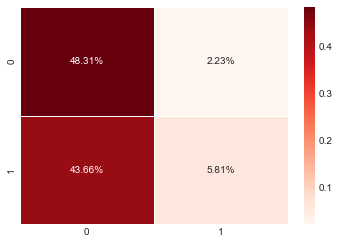

In [98]:
savefig_location = "conf_base_model.png"
sns.heatmap(res/np.sum(res), annot=True, 
            fmt='.2%',linewidths=.5, cmap='Reds')
plt.savefig(savefig_location, bbox_inches="tight", dpi=880)

In [99]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_pred)

Confusion matrix, without normalization
[[998  46]
 [902 120]]


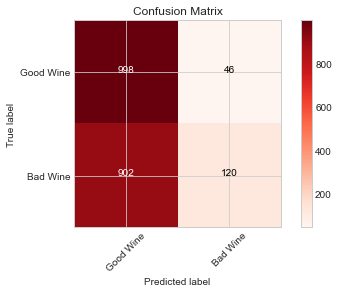

In [101]:
savefig_location = "conf2_base_model.png"
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
plt.savefig(savefig_location, bbox_inches="tight", dpi=880)

## Deep Learning Base Model with Different Loss

In [105]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Specify the model
model2 = Sequential()

model2.add(Dense(20, activation='relu', input_shape = (11,)))
model2.add(Dense(40, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='softmax'))
#model2.add(Dense(50, activation='relu', input_shape = (11,)))
#model2.add(Dense(154, activation='relu'))
#model2.add(Dense(132, activation='relu'))
#model2.add(Dense(16, activation='relu'))
#model2.add(Dense(1, activation='softmax'))

# Compile the model
adam = Adam(lr=0.003)
          
model2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 3)

# Fit the model
history_base2 = model2.fit(X_train, y_train, validation_split = 0.2, validation_data=(X_test, y_test),
           batch_size=2048, epochs = 10, callbacks = [early_stopping_monitor])

pred2 = model2.predict(X_test)
          
print(pred2)

/Users/jacquesdeclercq/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
4/4 [==============================] - 1s 54ms/step - loss: 0.0000e+00 - accuracy: 0.4895 - val_loss: 0.0000e+00 - val_accuracy: 0.5148
Epoch 2/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.4895 - val_loss: 0.0000e+00 - val_accuracy: 0.5148
Epoch 3/10
4/4 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.4895 - val_loss: 0.0000e+00 - val_accuracy: 0.5148
Epoch 4/10
4/4 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.4895 - val_loss: 0.0000e+00 - val_accuracy: 0.5148
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [32]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 20)                240       
_________________________________________________________________
dense_17 (Dense)             (None, 40)                840       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                410       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


### CONFUSING MATRIX

In [106]:
# Evaluating confusion matric
rounded_pred = np.argmax(pred2, axis=-1)
res2 = tf.math.confusion_matrix(y_test, rounded_pred)
 
# Printing the result
print('Confusion_matrix: ',res2)

Confusion_matrix:  tf.Tensor(
[[1044    0]
 [1022    0]], shape=(2, 2), dtype=int32)


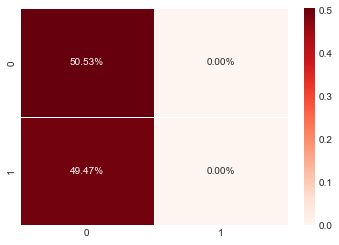

In [112]:
savefig_location = "conf_cross_base_model.png"
sns.heatmap(res2/np.sum(res2), annot=True, 
            fmt='.2%',linewidths=.5, cmap='Reds')
plt.savefig(savefig_location, bbox_inches="tight", dpi=880)

In [109]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_pred)

Confusion matrix, without normalization
[[1044    0]
 [1022    0]]


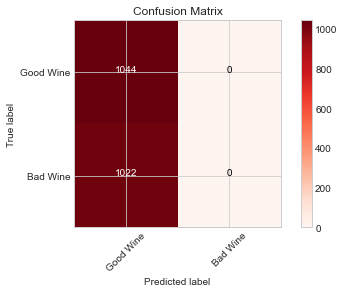

In [111]:
savefig_location = "conf_cross_base2_model.png"
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
plt.savefig(savefig_location, bbox_inches="tight", dpi=880)

### PLOTS COMPARING TWO FIRST MODELS

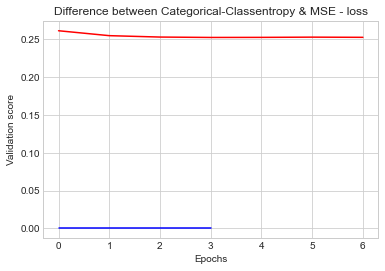

In [114]:
savefig_location = "compare_base_model.png"
plt.plot(history_base.history['val_loss'], 'r', history_base2.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.title("Difference between Categorical-Classentropy & MSE - loss")
plt.savefig(savefig_location, bbox_inches="tight", dpi=880)
plt.show()


### DEEP LEARNING MODEL WITH NORMALIZED DATA

In [67]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Specify the model
modeln = Sequential()

modeln.add(Dense(20, activation='relu', input_shape = (11,)))
modeln.add(Dense(40, activation='relu'))
modeln.add(Dense(60, activation='relu'))
modeln.add(Dense(10, activation='relu'))
modeln.add(Dense(2, activation='softmax'))

adam = Adam(lr=0.003)
# Compile the model
modeln.compile(optimizer = adam, loss = 'mean_squared_error',
metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 3)

# Fit the model
modeln = modeln.fit(Xn_train, yn_train,validation_split = 0.3,validation_data=(Xn_test, yn_test),
           batch_size=2048, epochs = 200, callbacks = [early_stopping_monitor])

pred = modeln.predict(Xn_test)

/Users/jacquesdeclercq/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
2/2 [==============================] - 1s 132ms/step - loss: 0.1884 - accuracy: 0.0000e+00 - val_loss: 0.1870 - val_accuracy: 0.0000e+00
Epoch 2/200
2/2 [==============================] - 0s 20ms/step - loss: 0.1883 - accuracy: 0.0000e+00 - val_loss: 0.1870 - val_accuracy: 0.0000e+00
Epoch 3/200
2/2 [==============================] - 0s 19ms/step - loss: 0.1883 - accuracy: 0.0000e+00 - val_loss: 0.1870 - val_accuracy: 0.0000e+00
Epoch 4/200
2/2 [==============================] - 0s 21ms/step - loss: 0.1883 - accuracy: 0.0000e+00 - val_loss: 0.1870 - val_accuracy: 0.0000e+00


AttributeError: 'History' object has no attribute 'predict'

In [79]:
model_n.summary()

AttributeError: 'History' object has no attribute 'summary'

### CONFUSION MATRIX

### DEEP LEARNING MODEL WITH STANDARDIZING DATA

In [68]:
y_train_s, y_test_s = to_categorical(y_train), to_categorical(y_test)

In [125]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Specify the model
models = Sequential()

models.add(Dense(20, activation='relu', input_shape = (11,)))
models.add(BatchNormalization())
models.add(Dense(40, activation='relu'))
models.add(Dense(1, activation='softmax'))

adam = Adam(lr=0.003)
# Compile the model
models.compile(optimizer = adam, loss = 'mean_squared_error',
metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 3)

# Fit the model
models_history = models.fit(X_train_s, y_train,validation_split = 0.3,validation_data=(X_test_s, y_test),
           batch_size=2048, epochs = 200, callbacks = [early_stopping_monitor])

preds1 = models.predict(X_test_s)

Epoch 1/200
3/3 [==============================] - 1s 70ms/step - loss: 0.5093 - accuracy: 0.4907 - val_loss: 0.4966 - val_accuracy: 0.5034
Epoch 2/200
3/3 [==============================] - 0s 11ms/step - loss: 0.5093 - accuracy: 0.4907 - val_loss: 0.4966 - val_accuracy: 0.5034
Epoch 3/200
3/3 [==============================] - 0s 11ms/step - loss: 0.5093 - accuracy: 0.4907 - val_loss: 0.4966 - val_accuracy: 0.5034
Epoch 4/200
3/3 [==============================] - 0s 13ms/step - loss: 0.5093 - accuracy: 0.4907 - val_loss: 0.4966 - val_accuracy: 0.5034


In [126]:
models.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 20)                240       
_________________________________________________________________
batch_normalization_11 (Batc (None, 20)                80        
_________________________________________________________________
dense_128 (Dense)            (None, 40)                840       
_________________________________________________________________
dense_129 (Dense)            (None, 1)                 41        
Total params: 1,201
Trainable params: 1,161
Non-trainable params: 40
_________________________________________________________________


In [128]:
# Evaluating confusion matric
rounded_pred = np.argmax(preds1, axis=-1)
res_s = tf.math.confusion_matrix(y_test, rounded_pred)
 
# Printing the result
print('Confusion_matrix: ',res_s)

Confusion_matrix:  tf.Tensor(
[[1044    0]
 [1022    0]], shape=(2, 2), dtype=int32)


### MODEL WITH STANDARDIZING & TARGET TO CATEGORICAL

In [46]:
y_train_s, y_test_s = to_categorical(y_train), to_categorical(y_test)

In [47]:
y_train_s

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [165]:

# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Specify the model
models1 = Sequential()

models1.add(Dense(20, activation='relu', input_shape = (11,)))
models1.add(Dense(40, activation='relu'))
models1.add(Dense(2, activation='softmax'))

adam = Adam(lr=0.003)
# Compile the model
models1.compile(optimizer = adam, loss = 'mean_squared_error',
metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 3)

# Fit the model
models1_history = models1.fit(X_train_s, y_train_s,validation_split = 0.3,validation_data=(X_test_s, y_test_s),
           batch_size=2048, epochs = 200, callbacks = [early_stopping_monitor])

preds2 = models1.predict(X_test_s)

/Users/jacquesdeclercq/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
3/3 [==============================] - 1s 69ms/step - loss: 0.2549 - accuracy: 0.5316 - val_loss: 0.2409 - val_accuracy: 0.6180
Epoch 2/200
3/3 [==============================] - 0s 12ms/step - loss: 0.2279 - accuracy: 0.6533 - val_loss: 0.2211 - val_accuracy: 0.6922
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 0.2091 - accuracy: 0.7050 - val_loss: 0.2081 - val_accuracy: 0.7112
Epoch 4/200
3/3 [==============================] - 0s 15ms/step - loss: 0.1965 - accuracy: 0.7263 - val_loss: 0.1996 - val_accuracy: 0.7205
Epoch 5/200
3/3 [==============================] - 0s 15ms/step - loss: 0.1878 - accuracy: 0.7384 - val_loss: 0.1941 - val_accuracy: 0.7241
Epoch 6/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1821 - accuracy: 0.7460 - val_loss: 0.1899 - val_accuracy: 0.7289
Epoch 7/200
3/3 [==============================] - 0s 13ms/step - loss: 0.1775 - accuracy: 0.7513 - val_loss: 0.1862 - val_accuracy: 0.7358
Epoch 8/200
3/3 [===

3/3 [==============================] - 0s 12ms/step - loss: 0.1306 - accuracy: 0.8198 - val_loss: 0.1473 - val_accuracy: 0.7914
Epoch 60/200
3/3 [==============================] - 0s 18ms/step - loss: 0.1301 - accuracy: 0.8212 - val_loss: 0.1475 - val_accuracy: 0.7874
Epoch 61/200
3/3 [==============================] - 0s 17ms/step - loss: 0.1298 - accuracy: 0.8214 - val_loss: 0.1471 - val_accuracy: 0.7886
Epoch 62/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1294 - accuracy: 0.8209 - val_loss: 0.1467 - val_accuracy: 0.7927
Epoch 63/200
3/3 [==============================] - 0s 13ms/step - loss: 0.1290 - accuracy: 0.8214 - val_loss: 0.1468 - val_accuracy: 0.7882
Epoch 64/200
3/3 [==============================] - 0s 13ms/step - loss: 0.1288 - accuracy: 0.8254 - val_loss: 0.1464 - val_accuracy: 0.7910
Epoch 65/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1282 - accuracy: 0.8264 - val_loss: 0.1460 - val_accuracy: 0.7943
Epoch 66/200
3/3 [========

3/3 [==============================] - 0s 16ms/step - loss: 0.1151 - accuracy: 0.8497 - val_loss: 0.1375 - val_accuracy: 0.8076
Epoch 118/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1148 - accuracy: 0.8485 - val_loss: 0.1373 - val_accuracy: 0.8120
Epoch 119/200
3/3 [==============================] - 0s 14ms/step - loss: 0.1147 - accuracy: 0.8503 - val_loss: 0.1374 - val_accuracy: 0.8144
Epoch 120/200
3/3 [==============================] - 0s 15ms/step - loss: 0.1144 - accuracy: 0.8508 - val_loss: 0.1373 - val_accuracy: 0.8116
Epoch 121/200
3/3 [==============================] - 0s 18ms/step - loss: 0.1144 - accuracy: 0.8485 - val_loss: 0.1372 - val_accuracy: 0.8100
Epoch 122/200
3/3 [==============================] - 0s 31ms/step - loss: 0.1141 - accuracy: 0.8506 - val_loss: 0.1374 - val_accuracy: 0.8124
Epoch 123/200
3/3 [==============================] - 0s 81ms/step - loss: 0.1141 - accuracy: 0.8520 - val_loss: 0.1371 - val_accuracy: 0.8116
Epoch 124/200
3/3 [=

In [135]:
models.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 20)                240       
_________________________________________________________________
batch_normalization_11 (Batc (None, 20)                80        
_________________________________________________________________
dense_128 (Dense)            (None, 40)                840       
_________________________________________________________________
dense_129 (Dense)            (None, 1)                 41        
Total params: 1,201
Trainable params: 1,161
Non-trainable params: 40
_________________________________________________________________


In [166]:
# Evaluating confusion matric
rounded_pred = np.argmax(preds2, axis=-1)
res_s = tf.math.confusion_matrix(y_test, rounded_pred)
 
# Printing the result
print('Confusion_matrix: ',res_s)

Confusion_matrix:  tf.Tensor(
[[455 589]
 [443 579]], shape=(2, 2), dtype=int32)


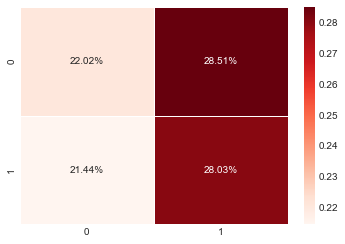

In [167]:
savefig_location = "models_conf.png"
sns.heatmap(res_s/np.sum(res_s), annot=True, 
            fmt='.2%',linewidths=.5, cmap='Reds')
plt.savefig(savefig_location, bbox_inches="tight", dpi=880)

### MODEL WITH STANDARDIZING & TARGET TO CATEGORICAL & BATCHNORMALIZATION

In [75]:

# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Specify the model
models2 = Sequential()

models2.add(Dense(20, activation='relu', input_shape = (11,)))
models2.add(BatchNormalization())
models2.add(Dense(40, activation='relu'))
models2.add(Dense(2, activation='softmax'))

adam = Adam(lr=0.003)
# Compile the model
models2.compile(optimizer = adam, loss = 'mean_squared_error',
metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 3)

# Fit the model
models2_history = models2.fit(X_train_s, y_train_s,validation_split = 0.3,validation_data=(X_test_s, y_test_s),
           batch_size=2048, epochs = 200, callbacks = [early_stopping_monitor])

preds = models2.predict(X_test_s)

Epoch 1/200
3/3 [==============================] - 1s 82ms/step - loss: 0.2806 - accuracy: 0.4866 - val_loss: 0.2583 - val_accuracy: 0.5103
Epoch 2/200
3/3 [==============================] - 0s 14ms/step - loss: 0.2289 - accuracy: 0.6261 - val_loss: 0.2358 - val_accuracy: 0.5889
Epoch 3/200
3/3 [==============================] - 0s 14ms/step - loss: 0.2037 - accuracy: 0.6924 - val_loss: 0.2212 - val_accuracy: 0.6507
Epoch 4/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1922 - accuracy: 0.7216 - val_loss: 0.2117 - val_accuracy: 0.6890
Epoch 5/200
3/3 [==============================] - 0s 15ms/step - loss: 0.1851 - accuracy: 0.7353 - val_loss: 0.2055 - val_accuracy: 0.7043
Epoch 6/200
3/3 [==============================] - 0s 11ms/step - loss: 0.1794 - accuracy: 0.7399 - val_loss: 0.2013 - val_accuracy: 0.7100
Epoch 7/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1743 - accuracy: 0.7562 - val_loss: 0.1981 - val_accuracy: 0.7225
Epoch 8/200
3/3 [===

3/3 [==============================] - 0s 16ms/step - loss: 0.1229 - accuracy: 0.8371 - val_loss: 0.1515 - val_accuracy: 0.7866
Epoch 60/200
3/3 [==============================] - 0s 15ms/step - loss: 0.1226 - accuracy: 0.8392 - val_loss: 0.1510 - val_accuracy: 0.7898
Epoch 61/200
3/3 [==============================] - 0s 14ms/step - loss: 0.1218 - accuracy: 0.8378 - val_loss: 0.1507 - val_accuracy: 0.7910
Epoch 62/200
3/3 [==============================] - 0s 14ms/step - loss: 0.1214 - accuracy: 0.8385 - val_loss: 0.1503 - val_accuracy: 0.7951
Epoch 63/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1208 - accuracy: 0.8423 - val_loss: 0.1500 - val_accuracy: 0.7902
Epoch 64/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1204 - accuracy: 0.8404 - val_loss: 0.1494 - val_accuracy: 0.7927
Epoch 65/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1201 - accuracy: 0.8454 - val_loss: 0.1490 - val_accuracy: 0.7931
Epoch 66/200
3/3 [========

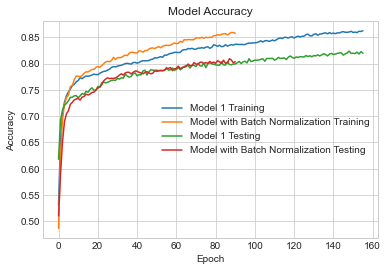

<Figure size 720x720 with 0 Axes>

In [168]:
savefig_location = "plot_comparison.png"
plt.plot(models1_history.history['accuracy'])
plt.plot(models2_history.history['accuracy'])
plt.plot(models1_history.history['val_accuracy'])
plt.plot(models2_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 1 Training','Model with Batch Normalization Training', 
            'Model 1 Testing', 'Model with Batch Normalization Testing'],
           loc='center right')
plt.figure(figsize=(10,10))
plt.savefig(savefig_location, bbox_inches="tight", dpi=880)

## RandomForest with Gridsearch

In [138]:
param_grid = {
    'n_estimators':[200,150,100,50],
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6]
}

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

Model_rf = RandomForestClassifier()
grid = GridSearchCV(estimator=Model_rf, param_grid=param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
#print("The accuracy of RandomForestC Model is", round((accuracy_score(y_test, y_pred)),2), '%')
Model_rf = grid.best_estimator_

RandomForestClassifier(max_depth=6)


In [140]:
y_pred = Model_rf.predict(X_test)
y_train_pred = Model_rf.predict(X_train)

In [141]:
print("TEST ACCURACY SCORE :", round(accuracy_score(y_test, y_pred),5),'%')
print("TRAIN ACCURACY SCORE :",round(accuracy_score(y_train,y_train_pred),5),'%')

TEST ACCURACY SCORE : 0.80058 %
TRAIN ACCURACY SCORE : 0.81578 %


In [82]:
scores = cross_val_score(Model_rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79322854 0.81378476 0.79782082 0.77845036 0.7905569  0.82324455
 0.82445521 0.79297821 0.78087167 0.79539952]
Mean: 0.7990790540797714
Standard Deviation: 0.015363684757288517


In [142]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(Model_rf.feature_importances_,3)})

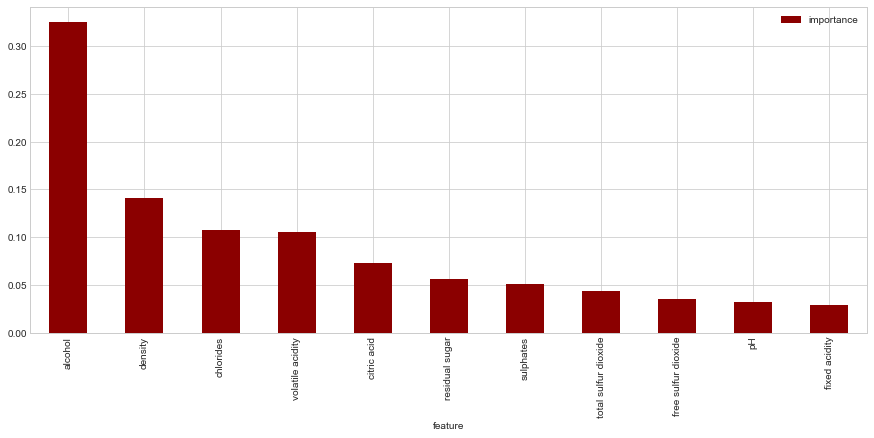

In [143]:
savefig_location = "importance.png"
importances1 = importances.sort_values('importance',ascending=False).set_index('feature')
importances1.plot(kind='bar',figsize=(15,6), color='darkred')
plt.savefig(savefig_location, bbox_inches="tight", dpi=880)

### DECISIONTREE CLASSIFIER WITH RANDOMIZED SEARCH

In [144]:
SEED = 1

In [145]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
dtc = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
dtc_cv = RandomizedSearchCV(dtc, param_dist, cv=5)

# Fit it to the data

dtc_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dtc_cv.best_params_))
print("Best score is {}".format(dtc_cv.best_score_))

# Compute and print the confusion matrix and classification report
dtc_log = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 6}
Best score is 0.8391742239744602
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1044
           1       0.78      0.84      0.81      1022

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



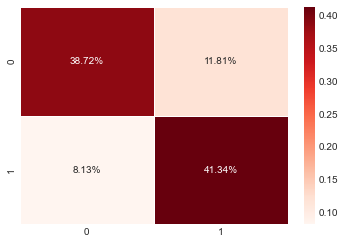

In [148]:
savefig_location = "confdec.png"
sns.heatmap(dtc_log/np.sum(dtc_log), annot=True, 
            fmt='.2%',linewidths=.5, cmap='Reds')
plt.savefig(savefig_location, bbox_inches="tight", dpi=880)

Confusion matrix, without normalization
[[800 244]
 [168 854]]


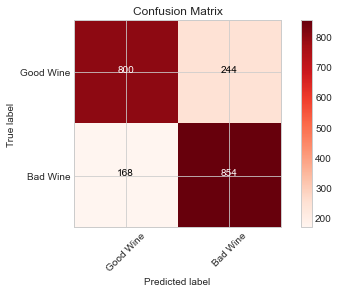

In [149]:
savefig_location = "confdec2.png"
plot_confusion_matrix(cm=dtc_log, classes=cm_plot_labels, title='Confusion Matrix')
plt.savefig(savefig_location, bbox_inches="tight", dpi=880)

### LOGISTIC REGRESSION

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
# Create the classifier: logreg
logreg = LogisticRegression(random_state=1, solver='lbfgs')

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
conf_log = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1044
           1       0.72      0.76      0.74      1022

    accuracy                           0.74      2066
   macro avg       0.74      0.74      0.74      2066
weighted avg       0.74      0.74      0.74      2066



/Users/jacquesdeclercq/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

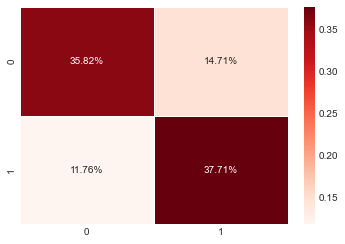

In [152]:
sns.heatmap(conf_log/np.sum(conf_log), annot=True, 
            fmt='.2%',linewidths=.5, cmap='Reds')

Confusion matrix, without normalization
[[740 304]
 [243 779]]


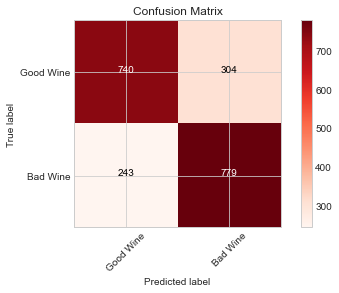

In [154]:
savefig_location = "conflog.png"
plot_confusion_matrix(cm=conf_log, classes=cm_plot_labels, title='Confusion Matrix')
plt.savefig(savefig_location, bbox_inches="tight", dpi=880)

In [155]:
# Import necessary modules
from sklearn.metrics import roc_curve, roc_auc_score


# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# calculate scores
lr_auc = roc_auc_score(y_test, y_pred_prob)
print('Logistic Regression: ROC AUC = %.3f' % (lr_auc))

Logistic Regression: ROC AUC = 0.801


In [156]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv = 5, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8012114702596516


/Users/jacquesdeclercq/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jacquesdeclercq/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

AUC scores computed using 5-fold cross-validation: [0.78847069 0.84290438 0.7993698  0.74866219 0.67036768]


/Users/jacquesdeclercq/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jacquesdeclercq/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

## Logistic Regression With GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

In [ ]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='1')

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr, label = 'Logistic Regression', color ="darkred")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Compare Decision Tree and Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')


In [ ]:
X_train.info()

In [ ]:
X_train = X_train.astype(int)

In [ ]:
y_train = y_train.astype(int)

In [ ]:


fig, ax = plt.subplots()

plot_decision_regions(X=np.array(X_train), y=np.array(y_train, clf=clf,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width},
                      res=0.02, legend=2, ax=ax)

In [16]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

value = 1.5
width = 0.75

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X_train), y=np.array(y_train), clf=clf,
                      filler_feature_values={2: value, 3: value, 4: value, 
                                             5: value, 6: value,7:value,
                                             8:value,9:value,10:value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width,
                                            6: width, 7: width, 8: width, 9: width,
                                            10: width},
                        legend=2, ax=ax)
    plt.title(lab)

plt.show()

NameError: name 'clf1' is not defined

<Figure size 720x576 with 0 Axes>

In [ ]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=3,
                            max_features = 2, min_samples_leaf= 7, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

In [ ]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

In [ ]:
# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

### KNN NEIGBOURS



In [157]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

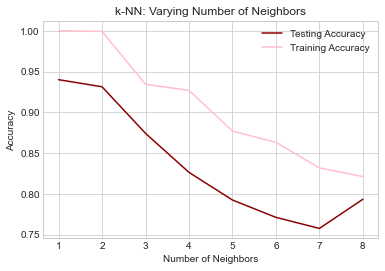

Test Accuracy Score : 0.79
Training Accuracy Score : 0.82


In [158]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', color = 'darkred')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy', color = 'pink')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Print the accuracy
print("Test Accuracy Score :", round(knn.score(X_test, y_test),2))
print("Training Accuracy Score :", round(knn.score(X_train, y_train),2))